# **Genetic Algorithm to Train a Perceptron (A single neuron model)**


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/

### ***NOTE***: Training a perceptron is a convex optimization problem, and there are easier methods to do so, and they also guarantee the convergence as well. Our aim here is to apply GA algorithm that we just learned on an example, and what is better than training a neuron!


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia

## Perceptron Implementation

In [0]:
def perceptron(x1,x2,w1,w2,b):
                     #this is a two input perceptron
                     # we really really should implement neural networks in vector form, otherwise our programs would be awfully slow! 
                     # we had an entire exercise on this. Here just for the sake of simplicity and better understanding of what is happening we are using looping
                     #otherwise vectorization is a must.
  if(0<(x1*w1+x2*w2+b)):
    return(1)
  else:
    return(0)

## The Data
We synthetically create a 2D data set, which is composed of two labeled classes, red and blue, represented by 0 and 1. The result is a NumPy array X of size (Data_set_size, 2). Data_set_size is a variable, where we set to a number, we set it to 200 here; please see code below. Each row of X is one data point, and it is two dimensional, and contains the coordinates of the data point. Y is of size (Data_set_size), and it contains the labls of each data point, 0 or 1. This is our training data. We would like to train the Perceptron with this Data set to learn how to classify these two classes from each other. This is an optimization problem. And here we are using GA.

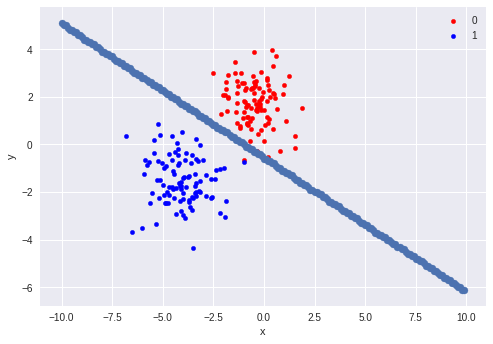

In [55]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
Data_set_size=200
X, Y = make_blobs(n_samples=Data_set_size, centers=2, n_features=2,cluster_std=1.0, center_box=(-4.0, 4.0),random_state=1)
dataX, dataY = X, Y
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
#Train the perceptron first then run this    
pyplot.scatter(line_x, line_y)
pyplot.show()


This is the GA that we used to find the minimum point of function f. Right out of the box, this code is not ready to apply to train the perceptron. Change it/hack it/edit it and make it to train the perceptron using the data set that we just created.

In [54]:
# as usual we import a bunch of modules that we need
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

np.random.seed(92)


# here we define the parameters of the algorithm. Some might even call these 
#hyperparameters; the parameters that define the model (they are different from parameters that the model is trying to optimzie or learn)
population_size=25                            # how many individuals are in the population. GA is a population based method.
population=np.random.rand(population_size,2)*8-4   # here we define a numpy array for the population, and randomly initilize it. 
                                                   # notice that we are initializing it within the solution space we are looking at, [-4 4]
                                                   # there are population_size of individuals, so we have the number of rows is population_size.
                                                   # each individual has two variables, x1 and x2, which relate to coordinates in the solution spcae. 
                                                   #therefore we have two columns.
new_population=np.zeros((population_size,2))       # this is a temporary place to hold the new generation while we are creating them from the current gen (population)
                                                   # when we are done creating the new generation, we copy the individuals from new_population to population.
tournament_size=4                         # we use tournment selection to select who would reproduce. tournament_size is the size of the tournament.                  
select_potantial_parents=np.zeros((tournament_size,2))   # this is where all potential parents selected to attend the tournament are hold.
max_generation_num=10                           # this says how many generation we should simulate. 
mutation_frac=0.4                                  # this says what fraction of new generation should be mutated.
mutation_scale=0.05                                 # this is the standard deviation of the noise that is added to 
                                                   #mutation_frac of the new generation that are randomly chosen to be mutated. 

# Get b from brute forcing, b at -0.3 gives 1 error out of 200  
b = -0.3

def f(z):                                          
    x,y=z
    h = [0] * tournament_size
    for n in range(tournament_size):
      for i in range(200):
        # Checking perceptron erro
        h[n] += (perceptron(x[n], y[n], dataX[i][0], dataX[i][1], b) != dataY[i])
    print(h) #For testing purposes, print out errors for each generation
    return (h)
  



def crossover(a,b):              # this function implements the corssover operation, it recives parents a and b, and produces the child c! 
  c=np.random.rand(2)
  beta=np.random.rand(1)
  c[0]=beta*a[0]+(1-beta)*b[0]
  beta=np.random.rand(1)
  c[1]=beta*a[1]+(1-beta)*b[1]
  return(c)


def mutation(new_population):    # This function implements mutation. It recives the new generation, and mutates mutation_frac of them by adding gaussian noise to them.
  num_of_mutation=math.ceil(len(new_population)*mutation_frac)
  mutation_index=np.random.choice(len(new_population),num_of_mutation, replace=False, p=None)
  new_population[mutation_index,:]=new_population[mutation_index,:]+np.random.normal(0,mutation_scale,(num_of_mutation,2))    
  return(new_population)
  
  

for i in range(0, max_generation_num):      # This is your generation loop... by looping this you are going through generation after generation.
  
  for j in range(0,population_size):     # This is your new population loop. At each loop you create a new instance for the next population. Therefore this loops population_size times.
    
    select_potantial_parents=population[np.random.choice(len(population), size=tournament_size, replace=False)] # this is where we select some potential parents randomly
                                                                                                                # and let them compete against each other in a tournament.
                                                                                                                # the winner is simply the one who is the most fitted!
                                                                                                              
                                                                                                                
                                                          
    z=select_potantial_parents[:,0] # this is just a hack that I used to manage to send a vector to f instead of looping. Can you combine this line with the 
                                  #next line into the third line altogether? There should be a way...  
    v=select_potantial_parents[:,1]
    parent_1=select_potantial_parents[np.argmin(f((z,v))),:]# this is where the most fitted individual in the tournament is selected to be parent 1.

    
    select_potantial_parents=population[np.random.choice(len(population), size=tournament_size, replace=False)]
    z=select_potantial_parents[:,0] # this is just a hack that I used to manage to send a vector to f instead of looping. Can you combine this line with the 
                                    #next line into the third line altogether? There should be a way...  
    v=select_potantial_parents[:,1]
    parent_2=select_potantial_parents[np.argmin(f((z,v))),:]#the same as above, but this time the second parent is selected.
    
    
    
    new_population[j,:]=crossover(parent_1,parent_2) # these two parents reproduce individual j of the new population.
  
  new_population=mutation(new_population)  # we mutate a fraction of the new generation. 
  population=new_population.copy()   
  #we replace the current generation with this new generation that we just created. 
  
#print(population)

    


[193, 192, 98, 133]
[133, 98, 1, 158]
[90, 179, 193, 1]
[191, 1, 158, 90]
[75, 193, 128, 107]
[192, 75, 192, 4]
[4, 49, 192, 172]
[28, 166, 90, 3]
[49, 90, 192, 119]
[11, 4, 172, 3]
[166, 107, 28, 193]
[4, 166, 11, 98]
[4, 192, 75, 3]
[75, 128, 98, 4]
[172, 166, 75, 28]
[172, 53, 49, 90]
[49, 192, 158, 1]
[11, 133, 94, 193]
[98, 133, 94, 75]
[158, 192, 94, 90]
[193, 98, 128, 192]
[75, 128, 158, 107]
[133, 1, 166, 98]
[192, 75, 192, 53]
[3, 90, 119, 193]
[3, 128, 1, 192]
[172, 4, 90, 192]
[3, 179, 133, 90]
[4, 193, 119, 192]
[128, 193, 28, 53]
[192, 28, 98, 11]
[133, 90, 107, 1]
[133, 3, 4, 1]
[166, 107, 75, 158]
[94, 166, 158, 119]
[172, 166, 192, 128]
[3, 98, 107, 90]
[192, 193, 3, 98]
[3, 193, 1, 94]
[53, 3, 191, 98]
[98, 158, 4, 192]
[94, 49, 192, 166]
[107, 28, 166, 193]
[179, 107, 119, 4]
[166, 192, 172, 133]
[192, 75, 193, 119]
[90, 3, 107, 158]
[107, 179, 3, 193]
[53, 75, 133, 98]
[133, 28, 4, 192]
[8, 38, 4, 97]
[3, 38, 46, 8]
[79, 26, 48, 4]
[9, 6, 38, 79]
[4, 4, 88, 8]
[6, 2,

In [0]:
line_x = []
line_y = []
for x in range(-100, 100):
  for y in range(-100, 100):
    if population[12][1] * y * .1 + population[12][0]* x * .1 + b < 0:
      line_x.append(x * 0.1)
      line_y.append(y * 0.1)
      break

In [48]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

Data_set_size=20
X, Y = make_blobs(n_samples=Data_set_size, centers=2, n_features=2,cluster_std=1.0, center_box=(-4.0, 4.0),random_state=1)
dataX, dataY = X, Y

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
#Train the perceptron first then run this    
pyplot.plot(line_x, line_y)
pyplot.show()